## Statistics

In [1]:
import copy
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

from data_loader import DataReader

In [2]:
df = DataReader().tweets_count_by_day()

In [3]:
df.head(60)

,created_at,count
0,2020-03-12,4551
1,2020-03-13,22956
2,2020-03-14,21985
3,2020-03-15,21092
4,2020-03-16,20679
5,2020-03-17,17951
6,2020-03-18,16577
7,2020-03-19,14949
8,2020-03-20,11003
9,2020-03-21,13878


In [8]:
cols = ["date", "Confirmed cases", "Associated death", "Recovered"]
df_iran = pd.DataFrame(columns=cols)

data_iran = [
["03-13", "11364", "514", "3529"],
["03-14", "12729", "611", "4339"],
["03-15", "13938", "724", "4590"],
["03-16", "14991", "853", "4996"],
["03-17", "16169", "988", "5389"],
["03-18", "17361", "1135", "5710"],
["03-19", "18407", "1284", "5710"],
["03-20", "19644", "1433", "6745"],
["03-21", "20610", "1556", "7635"],
["03-22", "21638", "1685", "7635"],
["03-23", "23049", "1812", "8376"],
["03-24", "24811", "1934", "8931"],
["03-25", "27017", "2077", "9625"],
["03-26", "29406", "2234", "10457"],
["03-27", "32332", "2378", "11133"],      
["03-28", "35408", "2517", "11679"],
["03-29", "38309", "2640", "12391"],
["03-30", "41495", "2757", "13911"],
["03-31", "44605", "2898", "14656"],
["04-01", "47593", "3036", "15473"],
["04-02", "50468", "3160", "16711"],
["04-03", "53183", "3294", "17935"],
["04-04", "55743", "3452", "19736"],
["04-05", "58226", "3603", "22011"],
["04-06", "60500", "3739", "24236"],
["04-07", "62589", "3872", "27039"],
["04-08", "64586", "3993", "29812"],
["04-09", "66220", "4110", "32309"],
["04-10", "68192", "4232", "35465"],
["04-11", "70029", "4357", "41947"],
["04-12", "71686", "4474", "43894"],
["04-13", "73303", "4585", "45983"],
["04-14", "74877", "4683", "48129"],
["04-15", "76389", "4777", "49933"],
["04-16", "77995", "4869", "52229"],
["04-17", "79494", "4958", "54064"],
["04-18", "80868", "5031", "55987"],
["04-19", "82211", "5118", "57023"]]

for record in data_iran:
    df_iran = df_iran.append({"date": record[0], "Confirmed cases": int(record[1]), "Associated death": int(record[2]), "Recovered": int(record[3])}, ignore_index=True)

In [6]:
df_iran.head(10)

,date,Confirmed cases,Associated death,Recovered
0,03-13,11364,514,3529
1,03-14,12729,611,4339
2,03-15,13938,724,4590
3,03-16,14991,853,4996
4,03-17,16169,988,5389
5,03-18,17361,1135,5710
6,03-19,18407,1284,5710
7,03-20,19644,1433,6745
8,03-21,20610,1556,7635
9,03-22,21638,1685,7635


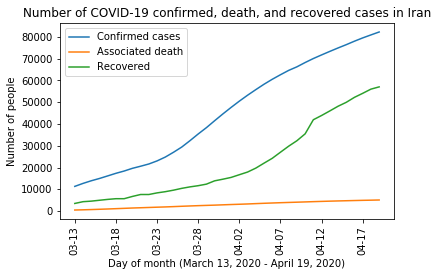

In [9]:
df_iran.set_index('date').plot();
plt.xticks(rotation='vertical')
plt.title("Number of COVID-19 confirmed, death, and recovered cases in Iran")
plt.xlabel("Day of month (March 13, 2020 - April 19, 2020)")
plt.ylabel("Number of people")
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('iran_cases.pdf', format="pdf", pad_inches=2)
plt.show()

## Plotting only original tweets

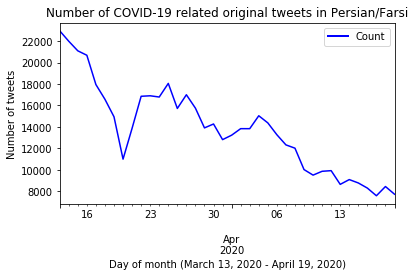

In [5]:
x = df[1:len(df)-1]
x.plot(x='created_at',y='count',color='blue')
plt.title("Number of COVID-19 related original tweets in Persian/Farsi")
plt.xlabel("Day of month (March 13, 2020 - April 19, 2020)")
plt.ylabel("Number of tweets")
plt.gcf().subplots_adjust(bottom=0.25)

# changing legend
custom_lines = [Line2D([0], [0], color="blue", lw=2)]
plt.legend(custom_lines, ['Count'])
plt.savefig('tweets_count.pdf', format="pdf", pad_inches=2)
plt.show()

## Plotting all types of tweets

In [2]:
# reading the number of different types of tweets
count_df = DataReader().tweet_count()

In [3]:
count_df

,retweet,quote,reply,original,date
9,12661,714,3048,4747,2020-03-12
8,62520,3336,13244,24468,2020-03-13
37,58667,2922,12234,23736,2020-03-14
36,58520,2934,11353,22834,2020-03-15
41,50528,2909,11470,22782,2020-03-16
40,42706,2555,10574,19884,2020-03-17
39,39518,2441,10018,18342,2020-03-18
38,35262,1978,8892,16766,2020-03-19
4,25307,1441,7075,12380,2020-03-20
3,31597,2093,9284,14684,2020-03-21


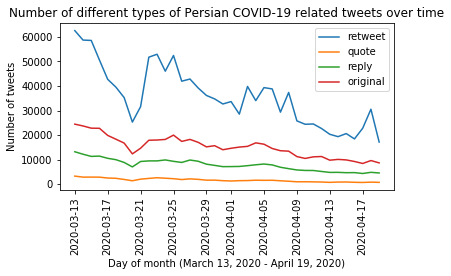

In [10]:
count_df[1:len(count_df)-3].set_index('date').plot()
plt.xticks(rotation='vertical')
plt.title("Number of different types of Persian COVID-19 related tweets over time")
plt.xlabel("Day of month (March 13, 2020 - April 19, 2020)")
plt.ylabel("Number of tweets")
plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('tweet_statistics.pdf', format="pdf", pad_inches=2)
plt.show()